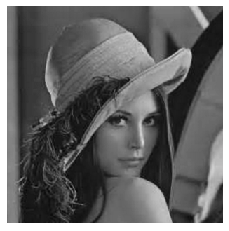

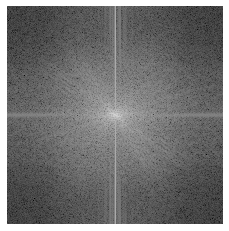

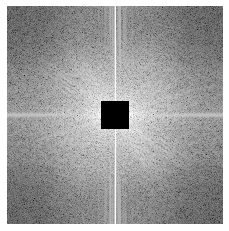

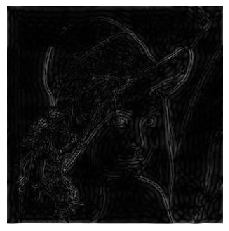

In [11]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt


# 不是jupyter 环境的话，注释掉下一行
%matplotlib inline

#读取图像
img = Image.open("./lenna.png").convert("L")

# 高通宽度/2
cw = 20

x,y = img.size

mask = np.ones((y,x), np.uint8)
mask[int(y/2-cw):int(y/2+cw), int(x/2-cw):int(x/2+cw)] = 0


#傅里叶变换
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

res1 = np.log(1 + np.abs(fshift))

fshift = fshift * mask
res2 = np.log(1 + np.abs(fshift))




#傅里叶逆变换
ishift = np.fft.ifftshift(fshift)
iimg = np.fft.ifft2(ishift)
iimg = np.abs(iimg)

#展示结果
plt.imshow(img, 'gray')
plt.axis('off')
plt.show()

plt.imshow(res1, 'gray')
plt.axis('off')
plt.show()

plt.imshow(res2, 'gray')
plt.axis('off')
plt.show()

plt.imshow(iimg, 'gray')
plt.axis('off')
plt.show()
